In [16]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [17]:
ssn = pd.read_csv('exported_data/smoothed_sunspot_data.csv')

ssn['Date'] = pd.to_datetime(ssn[['Year', 'Month']].assign(DAY=1))
ssn = ssn.drop(columns=['Year', 'Month'], axis=1)
ssn.head()

,Smoothed_SSN,Date
0,136.032418,1749-07-01
1,137.880220,1749-08-01
2,140.307393,1749-09-01
3,143.042957,1749-10-01
4,145.815934,1749-11-01


In [18]:
tsi = pd.read_csv('exported_data/tsi_13_month_smoothed.csv')

tsi['Date'] = pd.to_datetime(tsi[['Year', 'Month']].assign(DAY=1))
tsi = tsi.drop(columns=['Year', 'Month'], axis=1)
tsi.head()

,TSI_W_m2,Date
0,1363.841413,1947-08-01
1,1363.860329,1947-09-01
2,1363.898601,1947-10-01
3,1363.917975,1947-11-01
4,1363.884501,1947-12-01


In [19]:
ssn_tsi = pd.merge(ssn, tsi, on='Date', how='inner')
ssn_tsi.head()

,Smoothed_SSN,Date,TSI_W_m2
0,212.404196,1947-08-01,1363.841413
1,210.202797,1947-09-01,1363.860329
2,208.040559,1947-10-01,1363.898601
3,206.327273,1947-11-01,1363.917975
4,204.661538,1947-12-01,1363.884501


In [20]:
scaler = MinMaxScaler()

In [21]:
ssn_tsi[['Smoothed_SSN', 'TSI_W_m2']] = scaler.fit_transform(ssn_tsi[['Smoothed_SSN', 'TSI_W_m2']])
ssn_tsi.head()

,Smoothed_SSN,Date,TSI_W_m2
0,0.743424,1947-08-01,0.762371
1,0.735645,1947-09-01,0.777519
2,0.728004,1947-10-01,0.808167
3,0.721950,1947-11-01,0.823682
4,0.716063,1947-12-01,0.796876


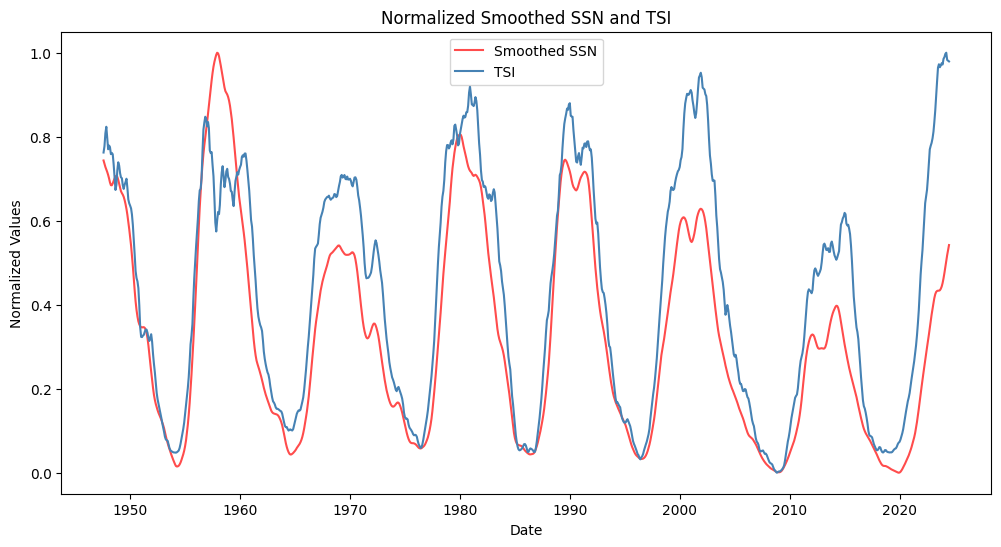

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(ssn_tsi['Date'], ssn_tsi['Smoothed_SSN'], label='Smoothed SSN', color='red', alpha=0.7)
plt.plot(ssn_tsi['Date'], ssn_tsi['TSI_W_m2'], label='TSI', color='steelblue')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.title('Normalized Smoothed SSN and TSI')
plt.legend()
plt.show()